### Zeitreihen mit Standard-ML-Verfahren verarbeiten: Fahrradausleihen, SF
#### 1) Daten laden und Datumsindex einstellen

In [61]:
import pandas as pd

data_url='trip_weather_hourly.csv'
df = pd.read_csv(data_url)
df.head()

,start_date,number_trips,duration,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,2013-08-29 09:00:00,12,1022.500000,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,2013-08-29 10:00:00,14,1677.857143,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
2,2013-08-29 11:00:00,42,2203.809524,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
3,2013-08-29 12:00:00,120,934.833333,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
4,2013-08-29 13:00:00,87,3934.103448,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107


#### 2) Features aus Datum extrahieren

In [66]:
from datetime import date, timedelta, datetime
from datetime import datetime
dates = [datetime.strptime(i, '%Y-%m-%d %H:%M:%S') for i in df['start_date']]
df['weekday'] = [i.weekday() for i in dates]
df['month'] = [i.month for i in dates]
df['hour'] = [i.hour for i in dates]
df

,start_date,number_trips,duration,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,weekday,month,hour
0,2013-08-29 09:00:00,12,1022.500000,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,11.0,28.0,0,4.0,NaN,286.0,94107,3,8,9
1,2013-08-29 10:00:00,14,1677.857143,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,11.0,28.0,0,4.0,NaN,286.0,94107,3,8,10
2,2013-08-29 11:00:00,42,2203.809524,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,11.0,28.0,0,4.0,NaN,286.0,94107,3,8,11
3,2013-08-29 12:00:00,120,934.833333,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,11.0,28.0,0,4.0,NaN,286.0,94107,3,8,12
4,2013-08-29 13:00:00,87,3934.103448,74.0,68.0,61.0,61.0,58.0,56.0,93.0,...,11.0,28.0,0,4.0,NaN,286.0,94107,3,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17578,2015-08-31 19:00:00,72,496.652778,78.0,69.0,60.0,58.0,57.0,54.0,84.0,...,9.0,21.0,0,1.0,NaN,246.0,94107,0,8,19
17579,2015-08-31 20:00:00,35,544.514286,78.0,69.0,60.0,58.0,57.0,54.0,84.0,...,9.0,21.0,0,1.0,NaN,246.0,94107,0,8,20
17580,2015-08-31 21:00:00,13,523.230769,78.0,69.0,60.0,58.0,57.0,54.0,84.0,...,9.0,21.0,0,1.0,NaN,246.0,94107,0,8,21
17581,2015-08-31 22:00:00,2,190.500000,78.0,69.0,60.0,58.0,57.0,54.0,84.0,...,9.0,21.0,0,1.0,NaN,246.0,94107,0,8,22


#### 3) Zusammenhang zwischen Ausleihen und  Monat, Wochentag und Stunde graphisch darstellen

C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_12108\2339472787.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='month', y='number_trips', color='b', ax=axs[0], ci=False)
C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_12108\2339472787.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='weekday', y='number_trips', color='r', ax=axs[1], ci=False)
C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_12108\2339472787.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=df, x='hour', y='number_trips', color='g', ax=axs[2], ci=False)


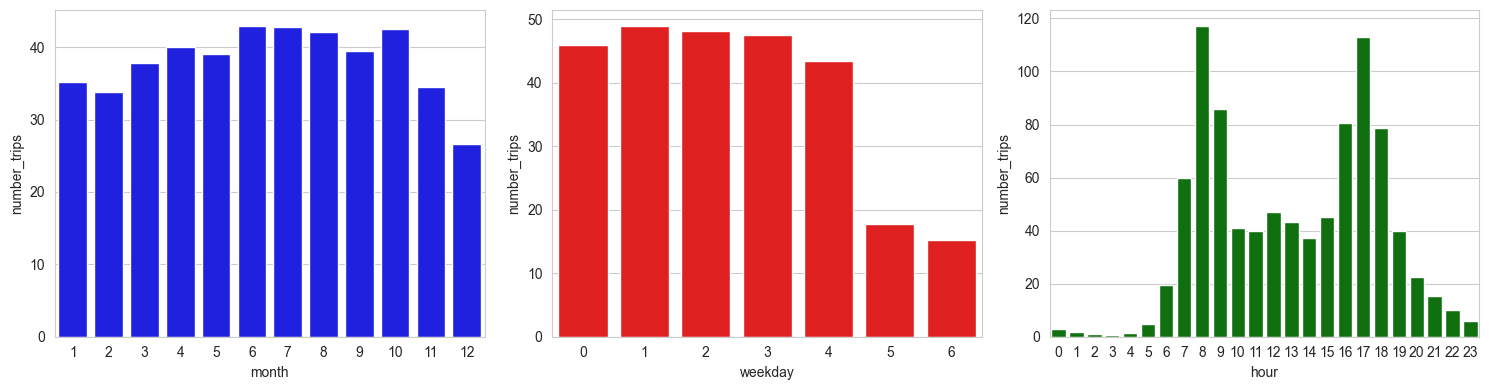

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
sns.barplot(data=df, x='month', y='number_trips', color='b', ax=axs[0], ci=False)
sns.barplot(data=df, x='weekday', y='number_trips', color='r', ax=axs[1], ci=False)
sns.barplot(data=df, x='hour', y='number_trips', color='g', ax=axs[2], ci=False)
plt.tight_layout()

### Regression mit Ausleihen als Zielvariable und Datumsangaben als Prädiktoren
#### 1) Aufteilung der Daten in Trainings-/Testdaten

In [68]:
from sklearn.model_selection import train_test_split

X = df[['month', 'weekday', 'hour']]
y = df['number_trips']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, 
                                            random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14066, 3), (3517, 3), (14066,), (3517,))

#### 2) One-Hot-Encodierung der Datumsangaben

In [58]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train)
X_test_ohe = ohe.transform(X_test)
X_train_ohe.shape, X_test_ohe.shape

((14066, 43), (3517, 43))

#### 3) Anlernen der Regression und Evaluation

In [69]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train_ohe, y_train)
r2 = linear.score(X_test_ohe, y_test)
print('r2 {:.3f}'.format(r2))

r2 0.665


In [74]:
y_pred = linear.predict(X_test_ohe)
#y_pred == y_test
(y_pred-y_test)/y_test # Relativer Fehler der Prädiktion

2449    -0.201869
2337    -0.133339
5567    -0.012613
9905          inf
11499   -0.388604
           ...   
8475    -0.335725
2888     2.094824
9160          inf
14906    0.169275
10466   -0.553516
Name: number_trips, Length: 3517, dtype: float64